# Speed Dating

## Challenge description

We will start a new data visualization and exploration project. Your goal will be to try to understand *love*! It's a very complicated subject so we've simplified it. Your goal is going to be to understand what happens during a speed dating and especially to understand what will influence the obtaining of a **second date**.

This is a Kaggle competition on which you can find more details here :

[Speed Dating Dataset](https://www.kaggle.com/annavictoria/speed-dating-experiment#Speed%20Dating%20Data%20Key.doc)

Take some time to read the description of the challenge and try to understand each of the variables in the dataset. Help yourself with this from the document : *Speed Dating - Variable Description.md*

### Rendering

To be successful in this project, you will need to do a descriptive analysis of the main factors that influence getting a second appointment. 

Over the next few days, you'll learn how to use python libraries like seaborn, plotly and bokeh to produce data visualizations that highlight relevant facts about the dataset.

For today, you can start exploring the dataset with pandas to extract some statistics.

In [2]:
!pip install plotly==4.9.0
!pip install jupyterlab "ipywidgets>=7.5"
!jupyter labextension install jupyterlab-plotly@4.9.0
!jupyter labextension install @jupyter-widgets/jupyterlab-manager plotlywidget@4.9.0
!jupyter lab build

  Using cached plotly-4.9.0-py2.py3-none-any.whl (12.9 MB)
Processing /home/jovyan/.cache/pip/wheels/c4/a7/48/0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56/retrying-1.3.3-py3-none-any.whl
Building jupyterlab assets (build:prod:minimize)
Building jupyterlab assets (build:prod:minimize)
[LabBuildApp] JupyterLab 2.2.8
[LabBuildApp] Building in /opt/conda/share/jupyter/lab
[LabBuildApp] Building jupyterlab assets (build:prod:minimize)


In [3]:
import pandas as pd
pd.options.display.max_columns = 200
pd.options.display.max_rows = 200
pd.options.display.max_info_columns = 200
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('SpeedDatingData.csv', encoding='ISO-8859-1')
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9

In [28]:
#df.info()

In [29]:
#df.describe(include='all').transpose()

In [5]:
# Preparation des données
dff = df[['iid', 'gender', 'age', 'race', 'income', 'career_c', 'dec', 'like', 'pid', 'age_o', 'race_o', 'dec_o', 'like_o', 'round', 'order', 'int_corr', 'samerace', 'match']]

dff.rename(columns={"iid": "indiv_id"}, inplace=True)

#print('gender retreatment...')
dff.loc[dff['gender'] == 0, 'gender_cat'] = 'F'
dff.loc[dff['gender'] == 1, 'gender_cat'] = 'M'

#print('round retreatment...')
dff.rename(columns={"round":"nb_people_in_wave"}, inplace=True)

#print('order retreatment...')
dff.rename(columns={"order":"order_in_wave"}, inplace=True)

#print('pid retreatment...')
dff.rename(columns={"pid":"partner_id", "int_corr": "interests_correlation"}, inplace=True)

#print('match retreatment...')
dff.loc[dff['match'] == 0, 'match_cat'] = 'N'
dff.loc[dff['match'] == 1, 'match_cat'] = 'Y'

#print('samerace retreatment...')
dff.loc[dff['samerace'] == 0, 'same_race_cat'] = 'N'
dff.loc[dff['samerace'] == 1, 'same_race_cat'] = 'Y'
dff.rename(columns={'samerace':'same_race'}, inplace=True)

#print('age_o retreatment...')
dff.rename(columns={'age_o':'age_partner'}, inplace=True)

#print('race_o retreatment...')
dff.rename(columns={'race_o':'race_partner'}, inplace=True)
dff.loc[dff['race_partner'] == 1, 'race_partner_cat'] = 'Black/African'
dff.loc[dff['race_partner'] == 2, 'race_partner_cat'] = 'European/Caucasian'
dff.loc[dff['race_partner'] == 3, 'race_partner_cat'] = 'Latino/Hispanic'
dff.loc[dff['race_partner'] == 4, 'race_partner_cat'] = 'Asian/Pacific Islander'
dff.loc[dff['race_partner'] == 5, 'race_partner_cat'] = 'Native American'
dff.loc[dff['race_partner'] == 6, 'race_partner_cat'] = 'Other'

#print('dec_o retreatment...')
dff.loc[dff['dec_o'] == 0, 'decision_partner_cat'] = 'N'
dff.loc[dff['dec_o'] == 1, 'decision_partner_cat'] = 'Y'
dff.rename(columns={'dec_o':'decision_partner'}, inplace=True)

#print('like_o retreatment...')
dff.rename(columns={'like_o':'like_partner'}, inplace=True)

#print('race retreatment...')
dff.loc[dff['race'] == 1, 'race_cat'] = 'Black/African'
dff.loc[dff['race'] == 2, 'race_cat'] = 'European/Caucasian'
dff.loc[dff['race'] == 3, 'race_cat'] = 'Latino/Hispanic'
dff.loc[dff['race'] == 4, 'race_cat'] = 'Asian/Pacific Islander'
dff.loc[dff['race'] == 5, 'race_cat'] = 'Native American'
dff.loc[dff['race'] == 6, 'race_cat'] = 'Other'

#print('income retreatment...')
dff.rename(columns={'income':'origin_med_income'}, inplace=True)
dff['origin_med_income'] = dff['origin_med_income'].fillna(-1).str.replace(',','').astype(float)

#print('career_c retreatment...')
dff.rename(columns={'career_c':'intended_career'}, inplace=True)
dff.loc[dff['intended_career'] == 1, 'intended_career_cat'] = 'Lawyer'
dff.loc[dff['intended_career'] == 2, 'intended_career_cat'] = 'Academic/Research'
dff.loc[dff['intended_career'] == 3, 'intended_career_cat'] = 'Psychologist'
dff.loc[dff['intended_career'] == 4, 'intended_career_cat'] = 'Doctor/Medicine'
dff.loc[dff['intended_career'] == 5, 'intended_career_cat'] = 'Engineer'
dff.loc[dff['intended_career'] == 6, 'intended_career_cat'] = 'Creative Arts/Entertainment'
dff.loc[dff['intended_career'] == 7, 'intended_career_cat'] = 'Banking/Consulting/Finance/Marketing/Business/CEO/Entrepreneur/Admin'
dff.loc[dff['intended_career'] == 8, 'intended_career_cat'] = 'Real Estate'
dff.loc[dff['intended_career'] == 9, 'intended_career_cat'] = 'International/Humanitarian Affairs'
dff.loc[dff['intended_career'] == 10, 'intended_career_cat'] = 'Undecided'
dff.loc[dff['intended_career'] == 11, 'intended_career_cat'] = 'Social Work'
dff.loc[dff['intended_career'] == 12, 'intended_career_cat'] = 'Speech Pathology'
dff.loc[dff['intended_career'] == 13, 'intended_career_cat'] = 'Politics'
dff.loc[dff['intended_career'] == 14, 'intended_career_cat'] = 'Pro sports/Athletics'
dff.loc[dff['intended_career'] == 15, 'intended_career_cat'] = 'Other'
dff.loc[dff['intended_career'] == 16, 'intended_career_cat'] = 'Journalism'
dff.loc[dff['intended_career'] == 17, 'intended_career_cat'] = 'Architecture'

#print('dec retreatment...')
dff.loc[dff['dec'] == 0, 'decision_cat'] = 'N'
dff.loc[dff['dec'] == 1, 'decision_cat'] = 'Y'
dff.rename(columns={'dec':'decision'}, inplace=True)

print('dff info :\n')
display(dff.info())
print('\n')
dff.head()

dff info :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   indiv_id               8378 non-null   int64  
 1   gender                 8378 non-null   int64  
 2   age                    8283 non-null   float64
 3   race                   8315 non-null   float64
 4   origin_med_income      4279 non-null   float64
 5   intended_career        8240 non-null   float64
 6   decision               8378 non-null   int64  
 7   like                   8138 non-null   float64
 8   partner_id             8368 non-null   float64
 9   age_partner            8274 non-null   float64
 10  race_partner           8305 non-null   float64
 11  decision_partner       8378 non-null   int64  
 12  like_partner           8128 non-null   float64
 13  nb_people_in_wave      8378 non-null   int64  
 14  order_in_wave          8378 non-null   int64

None

,indiv_id,gender,age,race,origin_med_income,intended_career,decision,like,partner_id,age_partner,race_partner,decision_partner,like_partner,nb_people_in_wave,order_in_wave,interests_correlation,same_race,match,gender_cat,match_cat,same_race_cat,race_partner_cat,decision_partner_cat,race_cat,intended_career_cat,decision_cat
0,1,0,21.0,4.0,69487.0,NaN,1,7.0,11.0,27.0,2.0,0,7.0,10,4,0.14,0,0,F,N,N,European/Caucasian,N,Asian/Pacific Islander,NaN,Y
1,1,0,21.0,4.0,69487.0,NaN,1,7.0,12.0,22.0,2.0,0,8.0,10,3,0.54,0,0,F,N,N,European/Caucasian,N,Asian/Pacific Islander,NaN,Y
2,1,0,21.0,4.0,69487.0,NaN,1,7.0,13.0,22.0,4.0,1,10.0,10,10,0.16,1,1,F,Y,Y,Asian/Pacific Islander,Y,Asian/Pacific Islander,NaN,Y
3,1,0,21.0,4.0,69487.0,NaN,1,7.0,14.0,23.0,2.0,1,7.0,10,5,0.61,0,1,F,Y,N,European/Caucasian,Y,Asian/Pacific Islander,NaN,Y
4,1,0,21.0,4.0,69487.0,NaN,1,6.0,15.0,24.0,3.0,1,8.0,10,7,0.21,0,1,F,Y,N,Latino/Hispanic,Y,Asian/Pacific Islander,NaN,Y


In [6]:
print('Nettoyage des données manquantes ...')
dff.dropna(axis=0, subset=['partner_id', 'interests_correlation', 'age_partner', 'race_partner', 'like_partner', 'age', 'race', 'intended_career', 'like'], inplace=True)
dff['partner_id'] = dff['partner_id'].astype(int)
dff['age_partner'] = dff['age_partner'].astype(int)
dff['age'] = dff['age'].astype(int)

print('\ndff info :')
display(dff.info())

print('\n')
dff.head()

Nettoyage des données manquantes ...

dff info :
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7775 entries, 30 to 8377
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   indiv_id               7775 non-null   int64  
 1   gender                 7775 non-null   int64  
 2   age                    7775 non-null   int64  
 3   race                   7775 non-null   float64
 4   origin_med_income      4015 non-null   float64
 5   intended_career        7775 non-null   float64
 6   decision               7775 non-null   int64  
 7   like                   7775 non-null   float64
 8   partner_id             7775 non-null   int64  
 9   age_partner            7775 non-null   int64  
 10  race_partner           7775 non-null   float64
 11  decision_partner       7775 non-null   int64  
 12  like_partner           7775 non-null   float64
 13  nb_people_in_wave      7775 non-null   int64  
 14  order_

None

,indiv_id,gender,age,race,origin_med_income,intended_career,decision,like,partner_id,age_partner,race_partner,decision_partner,like_partner,nb_people_in_wave,order_in_wave,interests_correlation,same_race,match,gender_cat,match_cat,same_race_cat,race_partner_cat,decision_partner_cat,race_cat,intended_career_cat,decision_cat
30,4,0,23,2.0,37754.0,1.0,0,6.0,11,27,2.0,0,6.0,10,3,-0.18,1,0,F,N,Y,European/Caucasian,N,European/Caucasian,Lawyer,N
31,4,0,23,2.0,37754.0,1.0,0,8.0,12,22,2.0,0,6.0,10,2,-0.18,1,0,F,N,Y,European/Caucasian,N,European/Caucasian,Lawyer,N
32,4,0,23,2.0,37754.0,1.0,0,4.0,13,22,4.0,1,10.0,10,9,0.05,0,0,F,N,N,Asian/Pacific Islander,Y,European/Caucasian,Lawyer,N
33,4,0,23,2.0,37754.0,1.0,1,8.0,14,23,2.0,1,8.0,10,4,-0.18,1,1,F,Y,Y,European/Caucasian,Y,European/Caucasian,Lawyer,Y
34,4,0,23,2.0,37754.0,1.0,0,7.0,15,24,3.0,1,9.0,10,6,0.21,0,0,F,N,N,Latino/Hispanic,Y,European/Caucasian,Lawyer,N


In [7]:
dff.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
indiv_id,7775,NaN,NaN,NaN,283.139,156.706,4,157,279,407,552
gender,7775,NaN,NaN,NaN,0.50135,0.50003,0,0,1,1,1
age,7775,NaN,NaN,NaN,26.3686,3.56078,18,24,26,28,55
race,7775,NaN,NaN,NaN,2.76527,1.23132,1,2,2,4,6
origin_med_income,4015,NaN,NaN,NaN,45074.8,17301.1,8607,31809,43367,54303,109031
intended_career,7775,NaN,NaN,NaN,5.24862,3.31252,1,2,6,7,17
decision,7775,NaN,NaN,NaN,0.43164,0.495337,0,0,0,1,1
like,7775,NaN,NaN,NaN,6.1408,1.83015,0,5,6,7,10
partner_id,7775,NaN,NaN,NaN,283.095,156.775,1,157,279,407,552
age_partner,7775,NaN,NaN,NaN,26.3621,3.56143,18,24,26,28,55


**Let's explore some factors that may influence getting a second appointment ....**

In [8]:
dff.head()

,indiv_id,gender,age,race,origin_med_income,intended_career,decision,like,partner_id,age_partner,race_partner,decision_partner,like_partner,nb_people_in_wave,order_in_wave,interests_correlation,same_race,match,gender_cat,match_cat,same_race_cat,race_partner_cat,decision_partner_cat,race_cat,intended_career_cat,decision_cat
30,4,0,23,2.0,37754.0,1.0,0,6.0,11,27,2.0,0,6.0,10,3,-0.18,1,0,F,N,Y,European/Caucasian,N,European/Caucasian,Lawyer,N
31,4,0,23,2.0,37754.0,1.0,0,8.0,12,22,2.0,0,6.0,10,2,-0.18,1,0,F,N,Y,European/Caucasian,N,European/Caucasian,Lawyer,N
32,4,0,23,2.0,37754.0,1.0,0,4.0,13,22,4.0,1,10.0,10,9,0.05,0,0,F,N,N,Asian/Pacific Islander,Y,European/Caucasian,Lawyer,N
33,4,0,23,2.0,37754.0,1.0,1,8.0,14,23,2.0,1,8.0,10,4,-0.18,1,1,F,Y,Y,European/Caucasian,Y,European/Caucasian,Lawyer,Y
34,4,0,23,2.0,37754.0,1.0,0,7.0,15,24,3.0,1,9.0,10,6,0.21,0,0,F,N,N,Latino/Hispanic,Y,European/Caucasian,Lawyer,N


A - Influence of common centers of interests in getting matches ? 

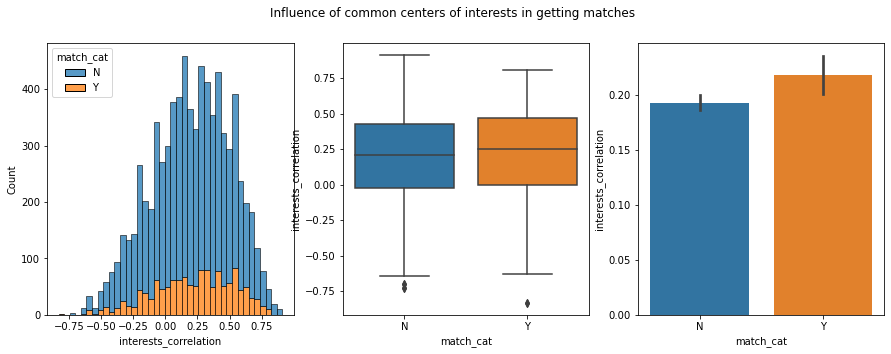

In [9]:
plt.figure(figsize=(15,5))
plt.suptitle('Influence of common centers of interests in getting matches')

plt.subplot(131)
#plt.title('Titre 1')
sns.histplot(data=dff, x="interests_correlation", hue="match_cat", multiple="stack");

plt.subplot(132)
#plt.title('Titre 2')
#sns.histplot(data=dff, x="interests_correlation", hue="match_cat", multiple="stack");
sns.boxplot(x="match_cat", y="interests_correlation", data=dff);
#sns.barplot(x="match_cat", y="interests_correlation", data=dff);

plt.subplot(133)
#plt.title('Titre 3')
sns.barplot(x="match_cat", y="interests_correlation", data=dff);
#sns.catplot(x="match_cat", y="interests_correlation", kind="violin", data=dff);

plt.show();

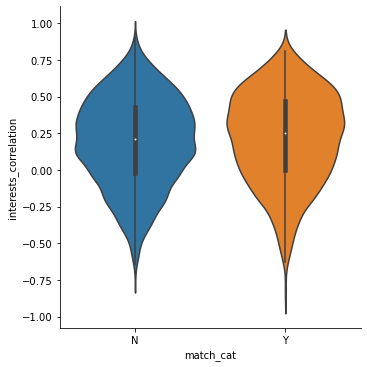

In [10]:
sns.catplot(x="match_cat", y="interests_correlation", kind="violin", data=dff);

In [11]:
dff.head()

,indiv_id,gender,age,race,origin_med_income,intended_career,decision,like,partner_id,age_partner,race_partner,decision_partner,like_partner,nb_people_in_wave,order_in_wave,interests_correlation,same_race,match,gender_cat,match_cat,same_race_cat,race_partner_cat,decision_partner_cat,race_cat,intended_career_cat,decision_cat
30,4,0,23,2.0,37754.0,1.0,0,6.0,11,27,2.0,0,6.0,10,3,-0.18,1,0,F,N,Y,European/Caucasian,N,European/Caucasian,Lawyer,N
31,4,0,23,2.0,37754.0,1.0,0,8.0,12,22,2.0,0,6.0,10,2,-0.18,1,0,F,N,Y,European/Caucasian,N,European/Caucasian,Lawyer,N
32,4,0,23,2.0,37754.0,1.0,0,4.0,13,22,4.0,1,10.0,10,9,0.05,0,0,F,N,N,Asian/Pacific Islander,Y,European/Caucasian,Lawyer,N
33,4,0,23,2.0,37754.0,1.0,1,8.0,14,23,2.0,1,8.0,10,4,-0.18,1,1,F,Y,Y,European/Caucasian,Y,European/Caucasian,Lawyer,Y
34,4,0,23,2.0,37754.0,1.0,0,7.0,15,24,3.0,1,9.0,10,6,0.21,0,0,F,N,N,Latino/Hispanic,Y,European/Caucasian,Lawyer,N


B - Influence of race on yes decisions (per gender) ?

In [114]:
#dff1 = dff.groupby(['race_cat', 'race_partner_cat', 'gender_cat']).agg({'decision':'sum', 'decision_cat':'count'})
#dff1 = dff1.rename(columns={'decision':'yes_decision', 'decision_cat':'total'})
#dff1['yes_decision_%'] = np.round(dff1['yes_decision'] / dff1['total']*100,2)
#dff1 = dff1.drop(['yes_decision', 'total'], axis=1)
#dff1 = dff1['yes_decision_%'].unstack('gender_cat')
#print('Influence of race in yes decision depending on gender category :')
#dff1

In [12]:
dffM = dff.loc[dff['gender_cat']=='M',:]
avg_male_yes_decision = round(dffM['decision'].sum()/dffM['decision_cat'].count()*100,2)
print(f'Average yes decision percentage for men = {avg_male_yes_decision}%')

Average yes decision percentage for men = 48.77%


In [13]:
dffM1 = dffM.groupby(['race_cat', 'race_partner_cat']).agg({'decision':'sum', 'decision_cat':'count'})
dffM1 = dffM1.rename(columns={'decision':'yes_decision', 'decision_cat':'total'})
dffM1['yes_decision_%'] = np.round(dffM1['yes_decision'] / dffM1['total']*100,2)
dffM1 = dffM1.drop(['yes_decision', 'total'], axis=1)
dffM1 = dffM1['yes_decision_%']
dffM1 = dffM1.unstack('race_partner_cat')
dffM1.index.names = ['race_male_cat']
dffM1.columns.names = ['race_female_partner_cat']
display(dffM1)

race_female_partner_cat,Asian/Pacific Islander,Black/African,European/Caucasian,Latino/Hispanic,Other
race_male_cat,,,,,
Asian/Pacific Islander,47.21,50.98,56.78,51.09,50.94
Black/African,43.18,66.67,61.36,63.16,50.00
European/Caucasian,38.55,46.40,47.88,52.78,44.44
Latino/Hispanic,32.76,38.46,50.75,48.00,64.71
Other,57.33,72.73,58.40,75.86,52.38


In [14]:
dffM2 = dffM1 - avg_male_yes_decision
dffM2

race_female_partner_cat,Asian/Pacific Islander,Black/African,European/Caucasian,Latino/Hispanic,Other
race_male_cat,,,,,
Asian/Pacific Islander,-1.56,2.21,8.01,2.32,2.17
Black/African,-5.59,17.90,12.59,14.39,1.23
European/Caucasian,-10.22,-2.37,-0.89,4.01,-4.33
Latino/Hispanic,-16.01,-10.31,1.98,-0.77,15.94
Other,8.56,23.96,9.63,27.09,3.61


In [15]:
dffF = dff.loc[dff['gender_cat']=='F',:]
avg_female_yes_decision = round(dffF['decision'].sum()/dffF['decision_cat'].count()*100,2)
print(f'Average yes decision percentage for women = {avg_female_yes_decision}%')

Average yes decision percentage for women = 37.53%


In [16]:
dffF1 = dffF.groupby(['race_cat', 'race_partner_cat']).agg({'decision':'sum', 'decision_cat':'count'})
dffF1 = dffF1.rename(columns={'decision':'yes_decision', 'decision_cat':'total'})
dffF1['yes_decision_%'] = np.round(dffF1['yes_decision'] / dffF1['total']*100,2)
dffF1 = dffF1.drop(['yes_decision', 'total'], axis=1)
dffF1 = dffF1['yes_decision_%']
dffF1 = dffF1.unstack('race_partner_cat')
dffF1.index.names = ['race_female_cat']
dffF1.columns.names = ['race_male_partner_cat']
display(dffF1)

race_male_partner_cat,Asian/Pacific Islander,Black/African,European/Caucasian,Latino/Hispanic,Other
race_female_cat,,,,,
Asian/Pacific Islander,41.53,40.91,43.86,36.84,36.00
Black/African,36.73,88.89,54.55,69.23,60.00
European/Caucasian,19.50,28.41,39.80,27.27,25.60
Latino/Hispanic,26.60,42.11,41.67,52.00,37.93
Other,26.42,37.50,42.96,58.82,38.10


In [17]:
dffF2 = dffF1 - avg_female_yes_decision
dffF2

race_male_partner_cat,Asian/Pacific Islander,Black/African,European/Caucasian,Latino/Hispanic,Other
race_female_cat,,,,,
Asian/Pacific Islander,4.00,3.38,6.33,-0.69,-1.53
Black/African,-0.80,51.36,17.02,31.70,22.47
European/Caucasian,-18.03,-9.12,2.27,-10.26,-11.93
Latino/Hispanic,-10.93,4.58,4.14,14.47,0.40
Other,-11.11,-0.03,5.43,21.29,0.57


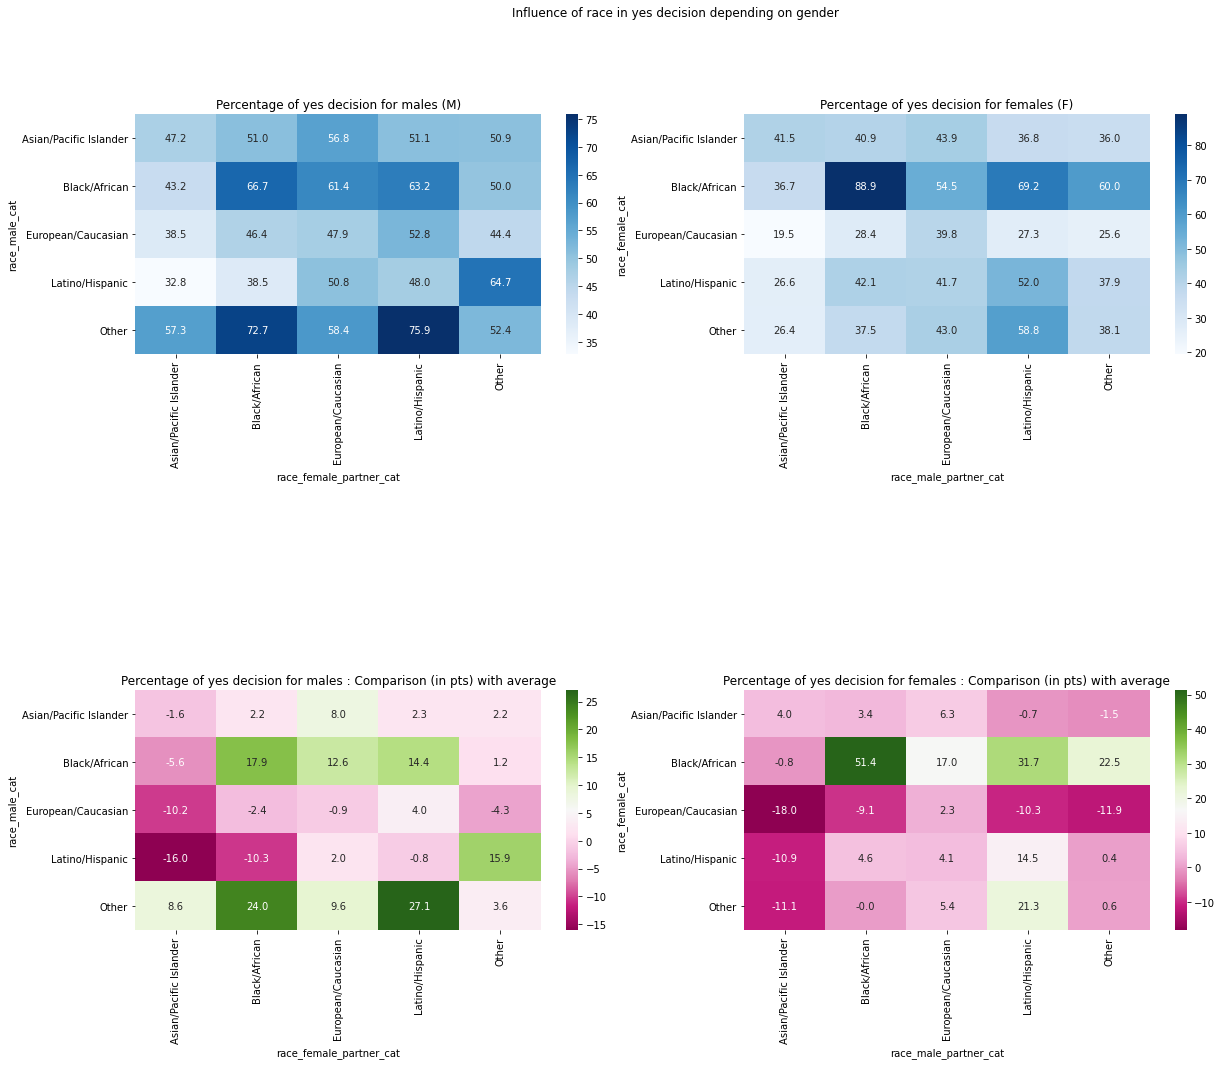

In [18]:
plt.figure(figsize=(20,15))
plt.suptitle('Influence of race in yes decision depending on gender')
plt.subplot(321)
plt.title('Percentage of yes decision for males (M)')
sns.heatmap(dffM1, annot=True, cmap="Blues", fmt='.1f');
plt.subplot(322)
plt.title('Percentage of yes decision for females (F)')
sns.heatmap(dffF1, annot=True, cmap="Blues", fmt='.1f');
plt.subplot(325)
plt.title('Percentage of yes decision for males : Comparison (in pts) with average')
sns.heatmap(dffM2, annot=True, cmap="PiYG", fmt='.1f');
plt.subplot(326)
plt.title('Percentage of yes decision for females : Comparison (in pts) with average')
sns.heatmap(dffF2, annot=True, cmap="PiYG", fmt='.1f');
plt.show();

In [19]:
dff.head()

,indiv_id,gender,age,race,origin_med_income,intended_career,decision,like,partner_id,age_partner,race_partner,decision_partner,like_partner,nb_people_in_wave,order_in_wave,interests_correlation,same_race,match,gender_cat,match_cat,same_race_cat,race_partner_cat,decision_partner_cat,race_cat,intended_career_cat,decision_cat
30,4,0,23,2.0,37754.0,1.0,0,6.0,11,27,2.0,0,6.0,10,3,-0.18,1,0,F,N,Y,European/Caucasian,N,European/Caucasian,Lawyer,N
31,4,0,23,2.0,37754.0,1.0,0,8.0,12,22,2.0,0,6.0,10,2,-0.18,1,0,F,N,Y,European/Caucasian,N,European/Caucasian,Lawyer,N
32,4,0,23,2.0,37754.0,1.0,0,4.0,13,22,4.0,1,10.0,10,9,0.05,0,0,F,N,N,Asian/Pacific Islander,Y,European/Caucasian,Lawyer,N
33,4,0,23,2.0,37754.0,1.0,1,8.0,14,23,2.0,1,8.0,10,4,-0.18,1,1,F,Y,Y,European/Caucasian,Y,European/Caucasian,Lawyer,Y
34,4,0,23,2.0,37754.0,1.0,0,7.0,15,24,3.0,1,9.0,10,6,0.21,0,0,F,N,N,Latino/Hispanic,Y,European/Caucasian,Lawyer,N


C - Influence of difference of age on yes decision (per gender) ?

In [20]:
dff['age_diff'] = dff['age'] - dff['age_partner']
dffM = dff.loc[dff['gender_cat']=='M',:]
dffF = dff.loc[dff['gender_cat']=='F',:]

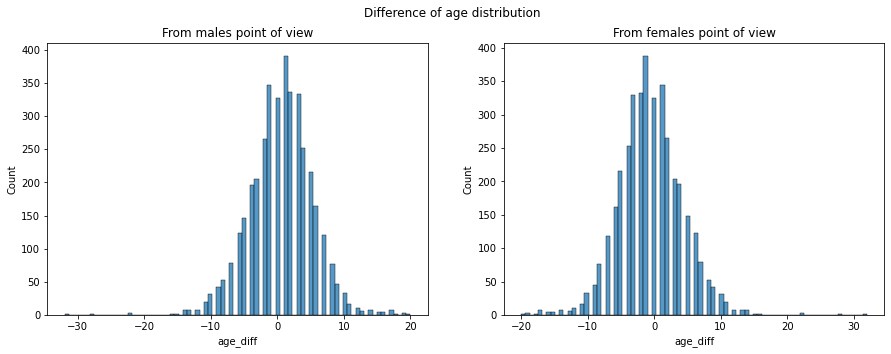

In [35]:
plt.figure(figsize=(15,5))
plt.suptitle('Difference of age distribution')

plt.subplot(121)
plt.title('From males point of view')
sns.histplot(x='age_diff', data=dffM);

plt.subplot(122)
plt.title('From females point of view')
sns.histplot(x='age_diff', data=dffF);

plt.show();

In [36]:
dffM1C = dffM.groupby(['age_diff']).agg({'decision':'sum', 'decision_cat':'count'})
dffM1C = dffM1C.rename(columns={'decision':'yes_decision', 'decision_cat':'total'})
dffM1C['yes_decision_%'] = np.round(dffM1C['yes_decision'] / dffM1C['total']*100,2)
dffM1C =  dffM1C.reset_index()
dffM1C =  dffM1C.loc[abs(dffM1C['age_diff'])<=10,:]
display(dffM1C)

,age_diff,yes_decision,total,yes_decision_%
9,-10,13,32,40.62
10,-9,20,42,47.62
11,-8,18,52,34.62
12,-7,33,79,41.77
13,-6,49,123,39.84
14,-5,56,147,38.10
15,-4,94,196,47.96
16,-3,105,205,51.22
17,-2,146,265,55.09
18,-1,180,348,51.72


In [37]:
dffF1C = dffF.groupby(['age_diff']).agg({'decision':'sum', 'decision_cat':'count'})
dffF1C = dffF1C.rename(columns={'decision':'yes_decision', 'decision_cat':'total'})
dffF1C['yes_decision_%'] = np.round(dffF1C['yes_decision'] / dffF1C['total']*100,2)
dffF1C =  dffF1C.reset_index()
dffF1C =  dffF1C.loc[abs(dffF1C['age_diff'])<=10,:]
display(dffF1C)

,age_diff,yes_decision,total,yes_decision_%
10,-10,11,33,33.33
11,-9,15,45,33.33
12,-8,26,77,33.77
13,-7,39,119,32.77
14,-6,54,161,33.54
15,-5,82,215,38.14
16,-4,94,253,37.15
17,-3,118,330,35.76
18,-2,130,332,39.16
19,-1,146,388,37.63


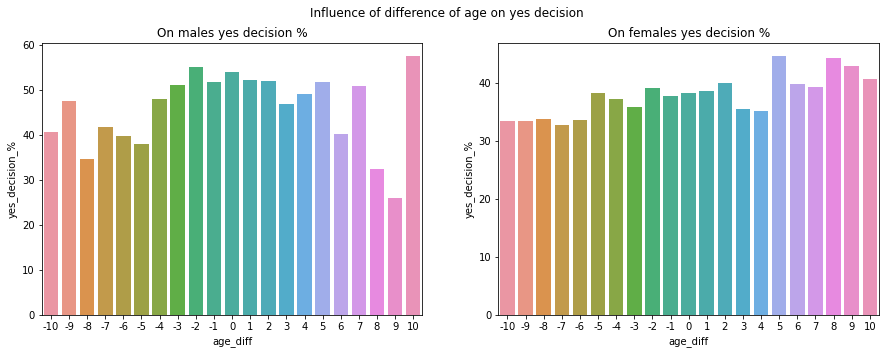

In [38]:
plt.figure(figsize=(15,5))
plt.suptitle('Influence of difference of age on yes decision')

plt.subplot(121)
plt.title('On males yes decision %')
sns.barplot(x='age_diff', y='yes_decision_%', data=dffM1C);

plt.subplot(122)
plt.title('On females yes decision %')
sns.barplot(x='age_diff', y='yes_decision_%', data=dffF1C);

plt.show();

D - Influence of the intended career : are some intended careers more attractives (per gender) ? (x = intended_career, y = match rate) : 2 bar plots

E - Influence of the Median income of the zipcode of origin (per gender) ? (x = origin_med_income, y = origin_med_income_partner (à recupérer), decision in %) : 2 heatmaps with percentage of Yes decision

F - Influence of the order of the dates on likes (per gender) ? (x = order_in_wave, y=decision) : 2 histogram plots